In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset (Credit Card Fraud Detection dataset from Kaggle)
data = pd.read_csv("creditcard.csv")

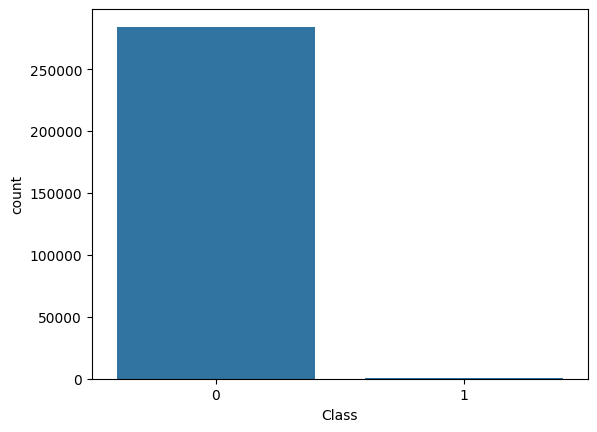

Fraudulent transactions ratio: 0    0.998273
1    0.001727
Name: Class, dtype: float64


In [2]:
# Examine the first few rows
data.head()

# Check for null values
data.isnull().sum()

# Explore class distribution
sns.countplot(x='Class', data=data)
plt.show()

# Calculate the ratio of fraudulent to non-fraudulent transactions
fraud_ratio = data['Class'].value_counts(normalize=True)
print("Fraudulent transactions ratio:", fraud_ratio)


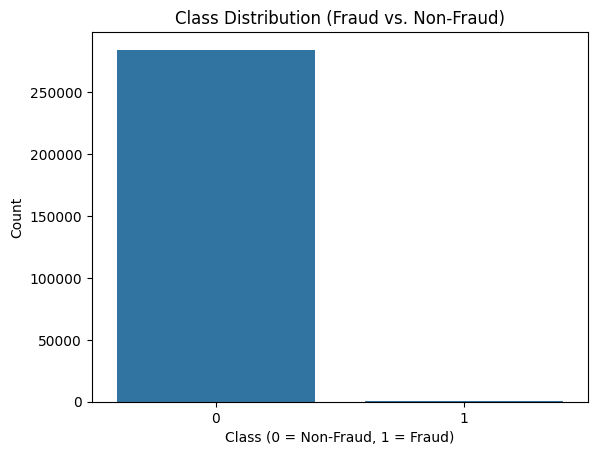

In [3]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


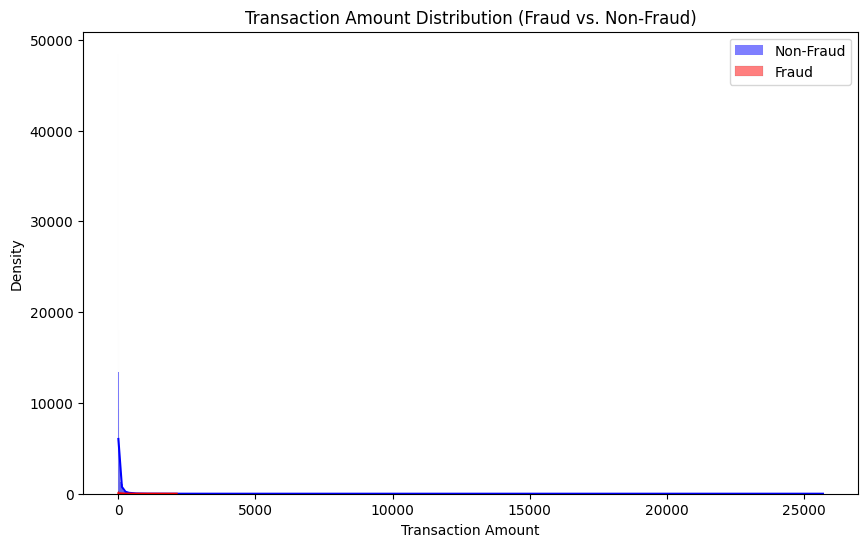

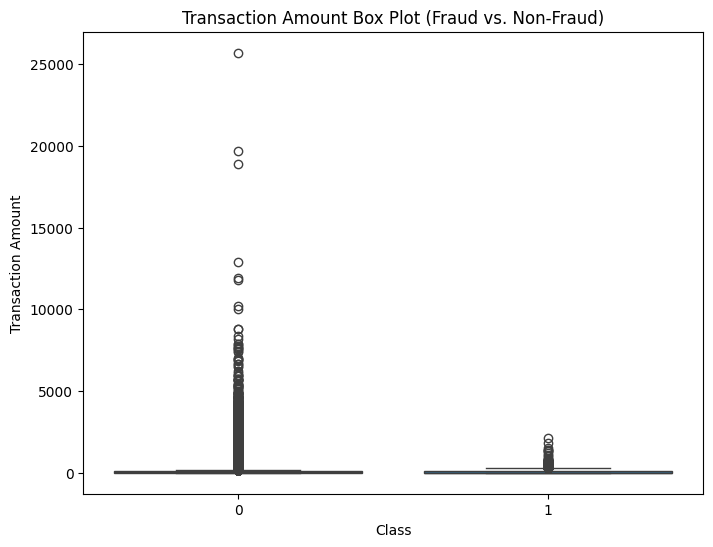

In [4]:
# Histogram to compare transaction amounts for both classes
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], kde=True, color='red', label='Fraud')
plt.title("Transaction Amount Distribution (Fraud vs. Non-Fraud)")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

# Box plot for the same comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Transaction Amount Box Plot (Fraud vs. Non-Fraud)")
plt.xlabel("Class")
plt.ylabel("Transaction Amount")
plt.show()


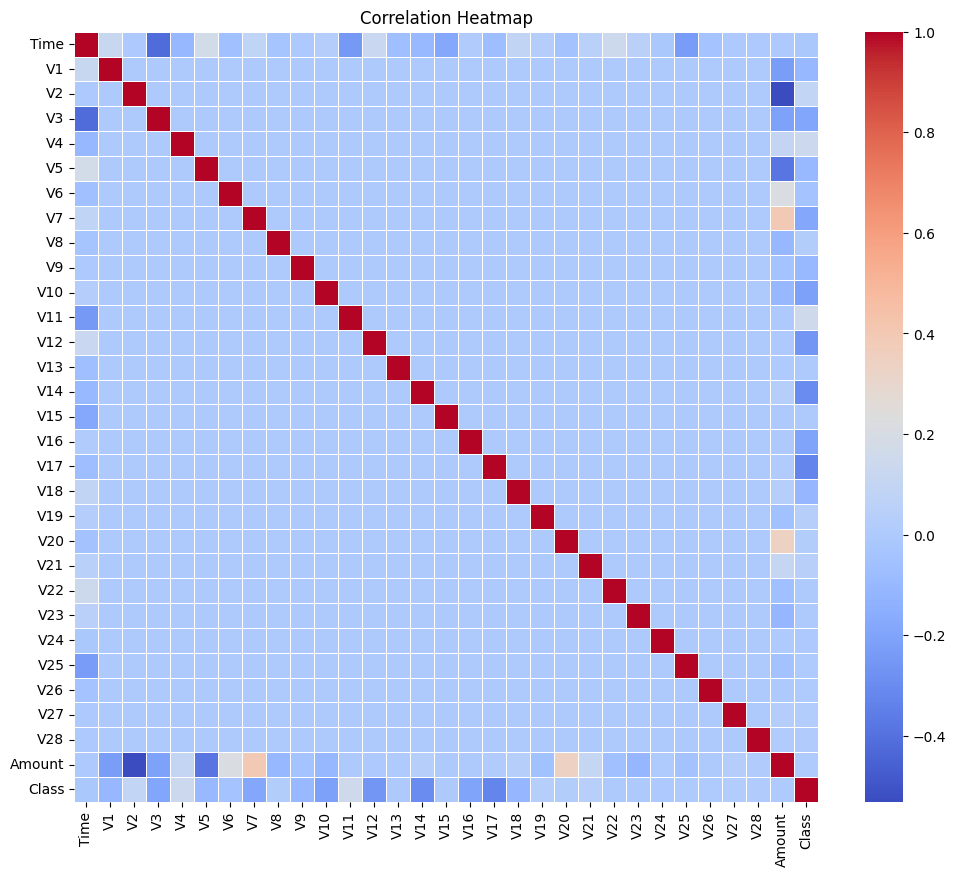

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


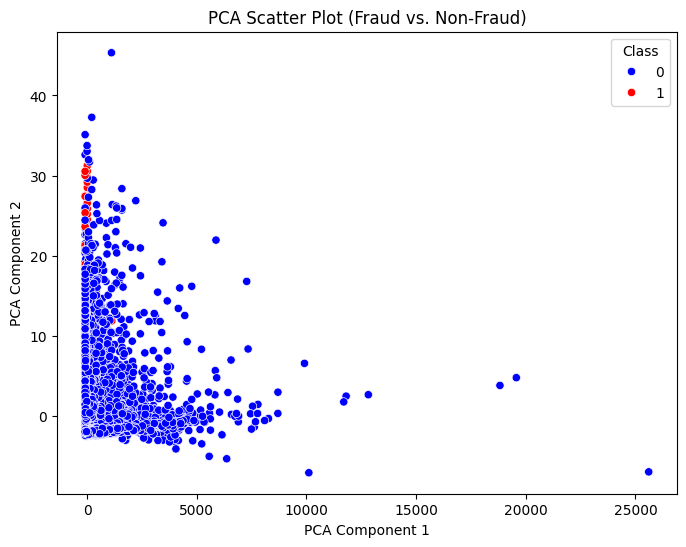

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(columns=['Class', 'Time']))

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Class'], palette={0: 'blue', 1: 'red'})
plt.title("PCA Scatter Plot (Fraud vs. Non-Fraud)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Apply t-SNE for a different view
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data.drop(columns=['Class', 'Time']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Class'], palette={0: 'blue', 1: 'red'})
plt.title("t-SNE Scatter Plot (Fraud vs. Non-Fraud)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [5]:
# Separate features from labels
X = data.drop(columns=['Class', 'Time'])  # Drop the class label and potentially the 'Time' column
y = data['Class']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Apply SMOTE to create a balanced dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)


In [7]:
# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (454904, 29)
Testing set size: (113726, 29)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [9]:
# Train a logistic regression model
logreg = LogisticRegression(random_state=42, class_weight='balanced')  # Use class_weight to handle imbalance
logreg.fit(X_train, y_train)

# Evaluate the logistic regression model
y_pred_logreg = logreg.predict(X_test)

# Generate evaluation metrics
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Calculate ROC-AUC score
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
print("Logistic Regression - ROC-AUC Score:", roc_auc_logreg)


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Confusion Matrix:
[[55375  1488]
 [ 4706 52157]]
Logistic Regression - ROC-AUC Score: 0.9455357613914144


In [10]:
# Train a random forest classifier
random_forest = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
random_forest.fit(X_train, y_train)

# Evaluate the random forest model
y_pred_rf = random_forest.predict(X_test)

# Generate evaluation metrics
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("Random Forest - ROC-AUC Score:", roc_auc_rf)


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56853    10]
 [    0 56863]]
Random Forest - ROC-AUC Score: 0.999912069359689


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for random forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
    'max_depth': [10, 20, None],  # Maximum depth of the tree
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    random_forest, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
